In [1]:
import sklearn

In [2]:
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [11]:
X,y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2].reshape(-1, 1)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [4]:
data= pd.DataFrame(X)
data['10'] = y

In [5]:
data.head()

,0,10
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [6]:
data.corr()

,0,10
0,1.00000,0.58645
10,0.58645,1.00000


In [11]:
X, y = make_regression(n_features=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
m = 150
#np.random.seed(42)
X = np.random.rand(m, 3) * 2
X= np.sort(X, axis= 0)
y = 4 * (X[:, 0] - 0.5) ** 2 + 6 * (X[:, 1] - 0.5)**2 + 2 * (X[:, 2] - 0.5)**5
y = y + np.random.randn(m,) / 10
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
X_train.shape

(120, 3)

In [25]:
reg1 = ldtr(max_depth = 10)
reg2 = LinearRegression(normalize = True,n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'linear')
reg5 = DecisionTreeRegressor(max_depth = 1)

In [26]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

linear Best 87 2
5.322545 6.634900331497192 5.322545
linear Best 71 0
1.5077422 6.634900331497192 1.5077422
1.5077422 6.634900331497192 3.667286
0 71
linear Best 44 0
0.083128735 0.41579318046569824 0.083128735
0.083128735 0.41579318046569824 0.21661003
0.083128735 0.41579318046569824 0.21661003
0 44
Decision Best 13 0
0.04916749522089958 0.04916749522089958 0.0532037
linear Best 14 1
0.029359788 0.04916749522089958 0.029359788
0.029359788 0.04916749522089958 0.029359788
1 14
linear Best 3 0
0.0137841385 0.05201220139861107 0.0137841385
0.0137841385 0.05201220139861107 0.025369845
0.0137841385 0.05201220139861107 0.025369845
0 3
Decision Best 2 2
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
2 2
Decision Best 1 2
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
2 1
linear Best 8 0
0.012094889 0.014622165821492672 0.012094889
0.012094889 0.014622165821492672 0.012094889
0.012094889 0.014622165821492672 0.012094889
0 8
linear Best 5 1
0.00062292203 0.012732221279293299 0.00062292203
linear Best 5 2
0.000614610

0.052968834 0.09753407165408134 0.052968834
0.052968834 0.09753407165408134 0.052968834
0.052968834 0.09753407165408134 0.052968834
0 91
linear Best 83 1
0.03368601 0.05052901245653629 0.03368601
0.03368601 0.05052901245653629 0.03368601
0.03368601 0.05052901245653629 0.03368601
1 83
linear Best 77 2
0.010439064 0.020882445853203535 0.010439064
0.010439064 0.020882445853203535 0.010439064
0.010439064 0.020882445853203535 0.010439064
2 77
linear Best 72 2
0.001292717 0.0132679995149374 0.001292717
0.001292717 0.0132679995149374 0.001292717
0.001292717 0.0132679995149374 0.001292717
2 72
linear Best 73 0
0.0005850073 0.0009152117127086967 0.0005850073
0.0005850073 0.0009152117127086967 0.0005850073
0.0005850073 0.0009152117127086967 0.0005850073
0 73
linear Best 75 1
7.1054274e-14 0.0011597015254665166 7.1054274e-14
7.1054274e-14 0.0011597015254665166 7.1054274e-14
7.1054274e-14 0.0011597015254665166 7.1054274e-14
1 75
Decision Best 74 2
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
2 74
Decision 

DecisionTreeRegressor(max_depth=1)

In [27]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)

In [28]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))

Mean squared error: 0.22
Mean squared error: 26.73
Mean squared error: 33.97
Mean squared error: 32.59
Mean squared error: 23.56


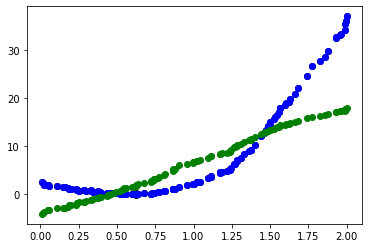

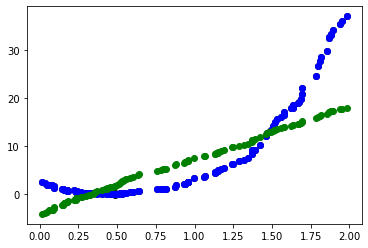

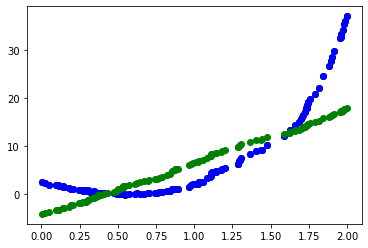

In [29]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg4.predict(X_train),  color='green')
    plt.show()

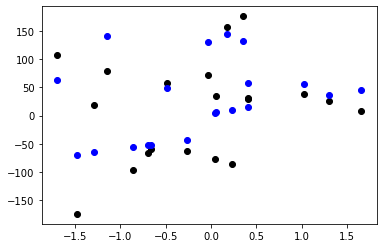

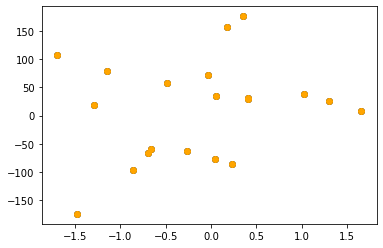

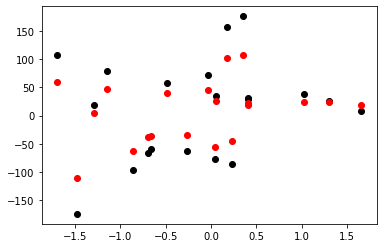

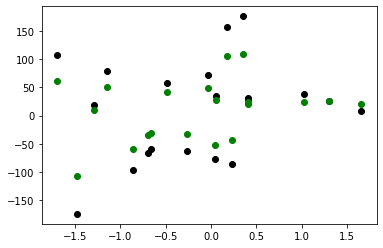

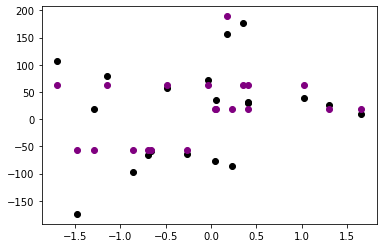

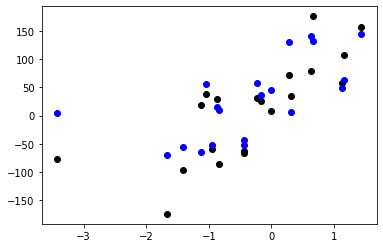

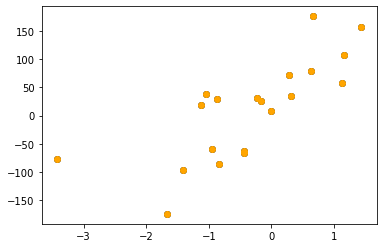

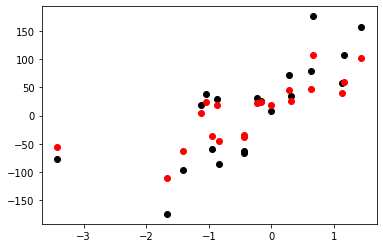

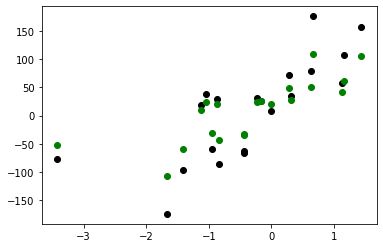

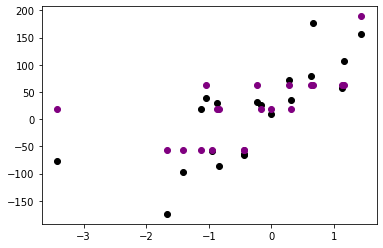

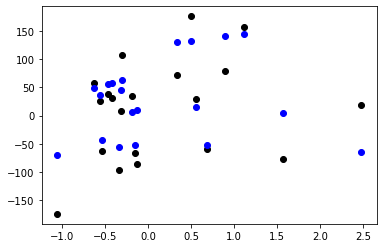

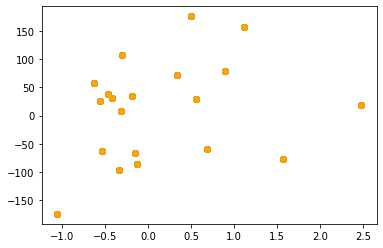

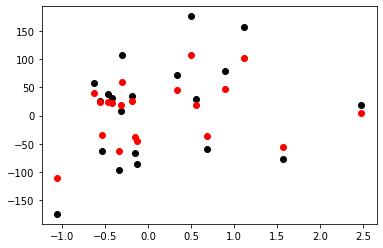

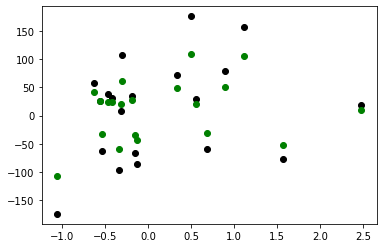

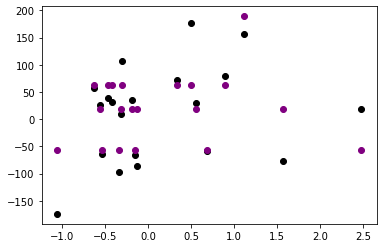

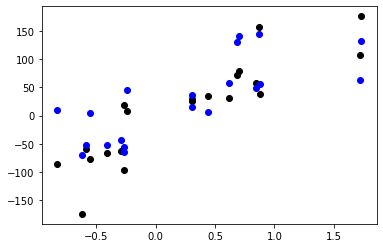

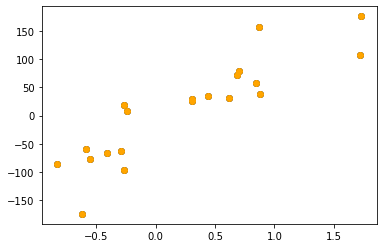

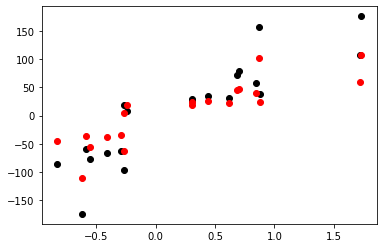

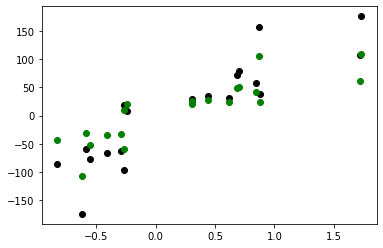

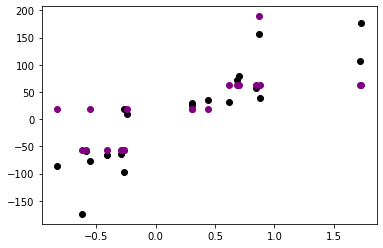

In [21]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred1, color='blue')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred2, color='orange')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred3, color='red')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred4, color='green')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred5, color='purple')
    plt.show()